# Basic Settings

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

# 천안시 출생아 수 현황 분석

## 분석 목적 : 천안시 단편적, 복합적 출생아 수의 현황을 분석하여 심각성 정도 확인

## 분석 방향
1. 단편적 출생아 수 현황 분석
2. 복합적 출생아 수 현황 분석(인구 대비)

### data 불러오기

In [4]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 출산율 data 불러오기

# xlsx 파일 경로 지정
file_path = '/content/drive/MyDrive/천안 공공데이터 활용 정책제안 공모전/dataset/충청남도_출생아 수.xlsx'
xls = pd.ExcelFile(file_path)

# xlsx 파일을 DataFrame으로 읽어오기
df_births_total = pd.read_excel(file_path, sheet_name=xls.sheet_names[0])
df_births_CCND = pd.read_excel(file_path, sheet_name=xls.sheet_names[1])

In [6]:
df_births_total

,구 분,2017년,2018년,2019년,2020년,2021년
0,전국,357771,326822,302676,272337,260562
1,서울특별시,65389,58074,53673,47445,45531
2,부산광역시,21480,19152,17049,15058,14446
3,대구광역시,15946,14400,13233,11193,10661
4,인천광역시,20445,20087,18522,16040,14947
5,광주광역시,10120,9105,8364,7318,7956
6,대전광역시,10851,9337,8410,7481,7414
7,울산광역시,9381,8149,7539,6617,6127
8,세종특별자치시,3504,3703,3819,3468,3570
9,경기도,94088,88175,83198,77737,76139


In [7]:
df_births_CCND

,구 분,2017년,2018년,2019년,2020년,2021년
0,충청남도,15670,14380,13228,11950,10984
1,천안시,5439,5213,4834,4646,4409
2,공주시,569,513,548,454,373
3,보령시,539,455,461,407,368
4,아산시,3031,2693,2362,1969,1810
5,서산시,1396,1341,1193,1106,1031
6,논산시,659,629,607,488,454
7,계룡시,334,269,223,183,169
8,당진시,1585,1380,1247,1058,953
9,금산군,233,211,207,185,149


### data 전처리

|dataset명|설명|전처리 필요한 부분|
|--|--|--|
|df_births_total|전국 시도별 출생아수 data|'전국'행 삭제후 시각화 필요|
|df_births_CCND|충청남도 각 시군별 출생아수 data|'충청남도'행 삭제후 시각화 필요|

#### Dataframe 전처리 진행

In [8]:
df_births_total = df_births_total.drop(0)
df_births_total

,구 분,2017년,2018년,2019년,2020년,2021년
1,서울특별시,65389,58074,53673,47445,45531
2,부산광역시,21480,19152,17049,15058,14446
3,대구광역시,15946,14400,13233,11193,10661
4,인천광역시,20445,20087,18522,16040,14947
5,광주광역시,10120,9105,8364,7318,7956
6,대전광역시,10851,9337,8410,7481,7414
7,울산광역시,9381,8149,7539,6617,6127
8,세종특별자치시,3504,3703,3819,3468,3570
9,경기도,94088,88175,83198,77737,76139
10,강원도,8958,8351,8283,7835,7357


In [9]:
df_births_CCND = df_births_CCND.drop(0)
df_births_CCND

,구 분,2017년,2018년,2019년,2020년,2021년
1,천안시,5439,5213,4834,4646,4409
2,공주시,569,513,548,454,373
3,보령시,539,455,461,407,368
4,아산시,3031,2693,2362,1969,1810
5,서산시,1396,1341,1193,1106,1031
6,논산시,659,629,607,488,454
7,계룡시,334,269,223,183,169
8,당진시,1585,1380,1247,1058,953
9,금산군,233,211,207,185,149
10,부여군,262,210,186,167,129


#### 1. 단편적 출생아 수 현황 분석

##### 전국 대비 충청남도 출생아수 비교 추이

In [10]:
df_births_total

,구 분,2017년,2018년,2019년,2020년,2021년
1,서울특별시,65389,58074,53673,47445,45531
2,부산광역시,21480,19152,17049,15058,14446
3,대구광역시,15946,14400,13233,11193,10661
4,인천광역시,20445,20087,18522,16040,14947
5,광주광역시,10120,9105,8364,7318,7956
6,대전광역시,10851,9337,8410,7481,7414
7,울산광역시,9381,8149,7539,6617,6127
8,세종특별자치시,3504,3703,3819,3468,3570
9,경기도,94088,88175,83198,77737,76139
10,강원도,8958,8351,8283,7835,7357


In [11]:
df_births_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 1 to 17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구 분     17 non-null     object
 1   2017년   17 non-null     int64 
 2   2018년   17 non-null     int64 
 3   2019년   17 non-null     int64 
 4   2020년   17 non-null     int64 
 5   2021년   17 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 948.0+ bytes


In [12]:
df_births_total.describe()

,2017년,2018년,2019년,2020년,2021년
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,21045.352941,19224.823529,17804.470588,16019.823529,15327.176471
std,23327.258138,21562.294234,20253.731996,18725.521599,18304.358628
min,3504.000000,3703.000000,3819.000000,3468.000000,3570.000000
25%,10120.000000,9105.000000,8364.000000,7481.000000,7414.000000
50%,12354.000000,11238.000000,10832.000000,9738.000000,8430.000000
75%,20445.000000,19152.000000,17049.000000,15058.000000,14446.000000
max,94088.000000,88175.000000,83198.000000,77737.000000,76139.000000


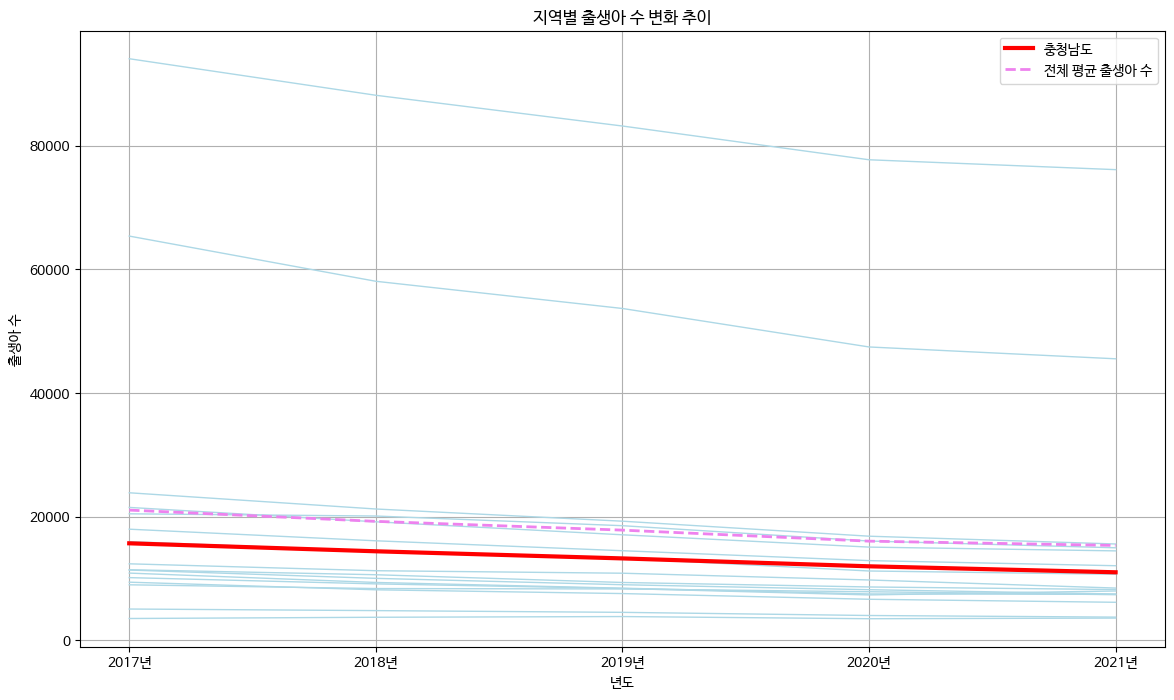

In [23]:
# 지역별 출생아 수 변화 추이

# 데이터 시각화
plt.figure(figsize=(14, 8))

# 다른 지역들은 눈에 잘 띄지 않는 색상 계열로 설정
light_blue = '#ADD8E6'

# 각 지역별 출생아 수 변화 추이 그리기
for region in df_births_total['구 분']:
    if region == '충청남도':
        plt.plot(df_births_total.columns[1:], df_births_total[df_births_total['구 분'] == region].iloc[0, 1:], label=region, linewidth=3, color='red')
    else:
        plt.plot(df_births_total.columns[1:], df_births_total[df_births_total['구 분'] == region].iloc[0, 1:], label='_nolegend_', linewidth=1, color=light_blue)

# 전체 평균 출생아 수 계산 및 그리기
average_births = df_births_total.iloc[:, 1:].mean()
plt.plot(df_births_total.columns[1:], average_births, label='전체 평균 출생아 수', linestyle='--', color='violet', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 출생아 수 변화 추이')
plt.xlabel('년도')
plt.ylabel('출생아 수')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

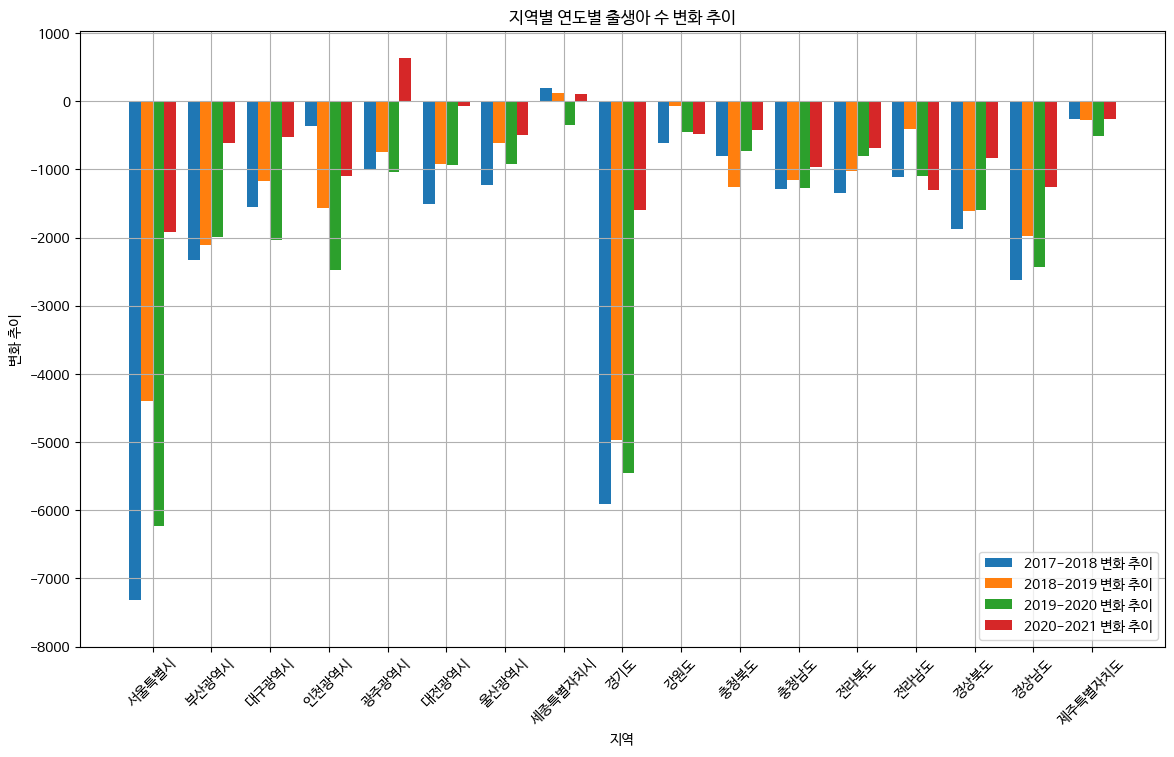

In [34]:
# 연도별 변화 추이 계산
diff_data = {
    '구 분': df_births_total['구 분'],
    '2017-2018 변화 추이': df_births_total['2018년'] - df_births_total['2017년'],
    '2018-2019 변화 추이': df_births_total['2019년'] - df_births_total['2018년'],
    '2019-2020 변화 추이': df_births_total['2020년'] - df_births_total['2019년'],
    '2020-2021 변화 추이': df_births_total['2021년'] - df_births_total['2020년']
}

df_diff = pd.DataFrame(diff_data)

# 데이터 시각화
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = np.arange(len(df_diff))

# 각 연도별 변화 추이 막대그래프 그리기
ax.bar(index - 1.5 * bar_width, df_diff['2017-2018 변화 추이'], bar_width, label='2017-2018 변화 추이')
ax.bar(index - 0.5 * bar_width, df_diff['2018-2019 변화 추이'], bar_width, label='2018-2019 변화 추이')
ax.bar(index + 0.5 * bar_width, df_diff['2019-2020 변화 추이'], bar_width, label='2019-2020 변화 추이')
ax.bar(index + 1.5 * bar_width, df_diff['2020-2021 변화 추이'], bar_width, label='2020-2021 변화 추이')

# 그래프 제목 및 축 레이블 설정
ax.set_xlabel('지역')
ax.set_ylabel('변화 추이')
ax.set_title('지역별 연도별 출생아 수 변화 추이')
ax.set_xticks(index)
ax.set_xticklabels(df_diff['구 분'], rotation=45)

# y축 눈금 설정
# 변화 추이의 최소값과 최대값을 계산
min_y = df_diff[['2017-2018 변화 추이', '2018-2019 변화 추이', '2019-2020 변화 추이', '2020-2021 변화 추이']].min().min()
max_y = df_diff[['2017-2018 변화 추이', '2018-2019 변화 추이', '2019-2020 변화 추이', '2020-2021 변화 추이']].max().max()

# y축 눈금 범위 설정
y_ticks = np.arange(np.floor(min_y / 1000) * 1000, np.ceil(max_y / 1000) * 1000 + 1000, 1000)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{int(tick)}" for tick in y_ticks])

# 범례 추가
ax.legend()

# 그리드 추가
ax.grid(True)

# 그래프 출력
plt.show()

##### 충청남도 내 지역별(시군별) 출생아수 비교 추이

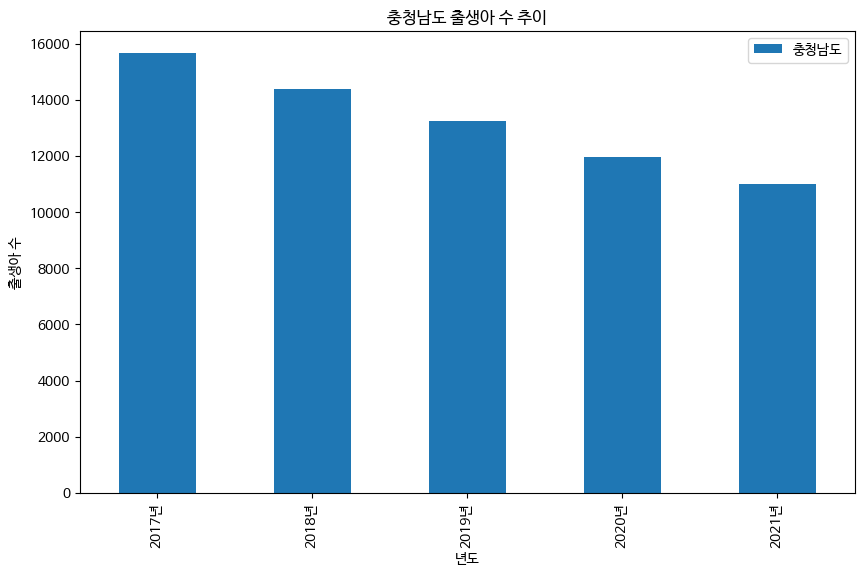

In [26]:
# 충청남도의 출생아 수 추이
chungnam_data = df_births_total[df_births_total['구 분'] == '충청남도'].iloc[:, 1:].T
chungnam_data.columns = ['충청남도']
chungnam_data.plot(kind='bar', figsize=(10, 6))
plt.title('충청남도 출생아 수 추이')
plt.xlabel('년도')
plt.ylabel('출생아 수')
plt.show()

In [35]:
df_births_CCND

,구 분,2017년,2018년,2019년,2020년,2021년
1,천안시,5439,5213,4834,4646,4409
2,공주시,569,513,548,454,373
3,보령시,539,455,461,407,368
4,아산시,3031,2693,2362,1969,1810
5,서산시,1396,1341,1193,1106,1031
6,논산시,659,629,607,488,454
7,계룡시,334,269,223,183,169
8,당진시,1585,1380,1247,1058,953
9,금산군,233,211,207,185,149
10,부여군,262,210,186,167,129


In [37]:
df_births_CCND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 1 to 15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구 분     15 non-null     object
 1   2017년   15 non-null     int64 
 2   2018년   15 non-null     int64 
 3   2019년   15 non-null     int64 
 4   2020년   15 non-null     int64 
 5   2021년   15 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 852.0+ bytes


In [38]:
df_births_CCND.describe()

,2017년,2018년,2019년,2020년,2021년
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1044.666667,958.666667,881.866667,796.666667,732.266667
std,1435.931687,1361.619397,1247.040260,1178.671144,1119.828779
min,121.000000,110.000000,104.000000,92.000000,90.000000
25%,267.000000,233.500000,212.000000,184.000000,164.500000
50%,539.000000,455.000000,461.000000,407.000000,368.000000
75%,1047.000000,985.000000,900.000000,809.000000,730.500000
max,5439.000000,5213.000000,4834.000000,4646.000000,4409.000000


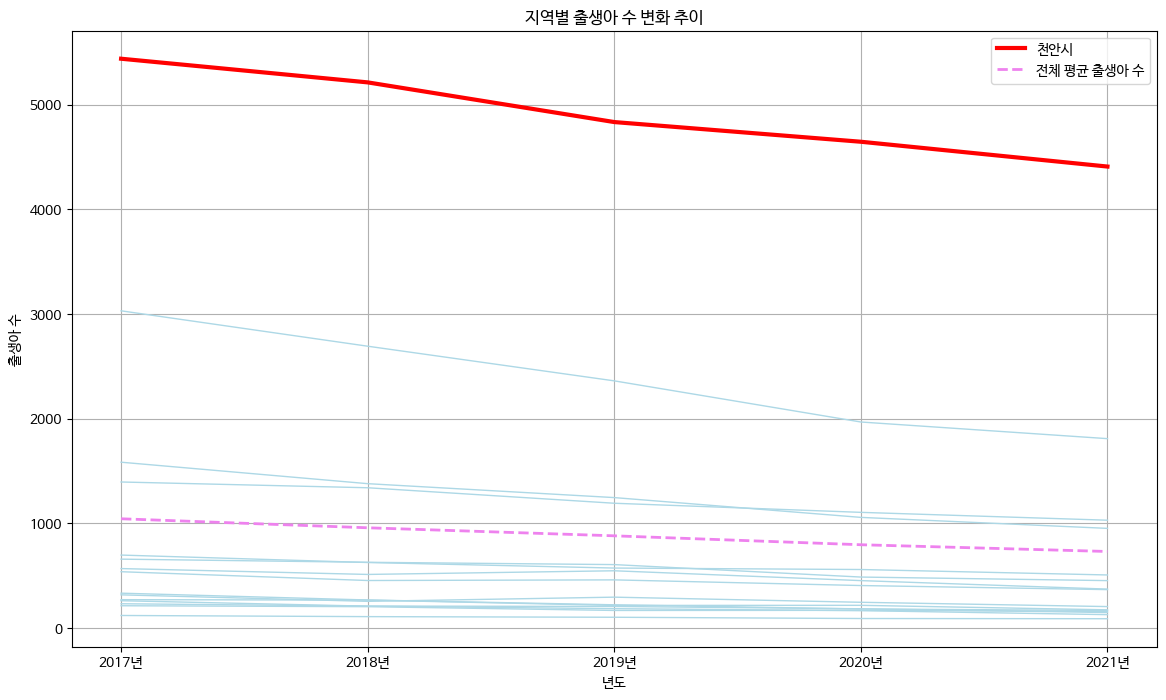

In [39]:
# 지역별 출생아 수 변화 추이

# 데이터 시각화
plt.figure(figsize=(14, 8))

# 다른 지역들은 눈에 잘 띄지 않는 색상 계열로 설정
light_blue = '#ADD8E6'

# 각 지역별 출생아 수 변화 추이 그리기
for region in df_births_CCND['구 분']:
    if region == '천안시':
        plt.plot(df_births_CCND.columns[1:], df_births_CCND[df_births_CCND['구 분'] == region].iloc[0, 1:], label=region, linewidth=3, color='red')
    else:
        plt.plot(df_births_CCND.columns[1:], df_births_CCND[df_births_CCND['구 분'] == region].iloc[0, 1:], label='_nolegend_', linewidth=1, color=light_blue)

# 전체 평균 출생아 수 계산 및 그리기
average_births = df_births_CCND.iloc[:, 1:].mean()
plt.plot(df_births_CCND.columns[1:], average_births, label='전체 평균 출생아 수', linestyle='--', color='violet', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 출생아 수 변화 추이')
plt.xlabel('년도')
plt.ylabel('출생아 수')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

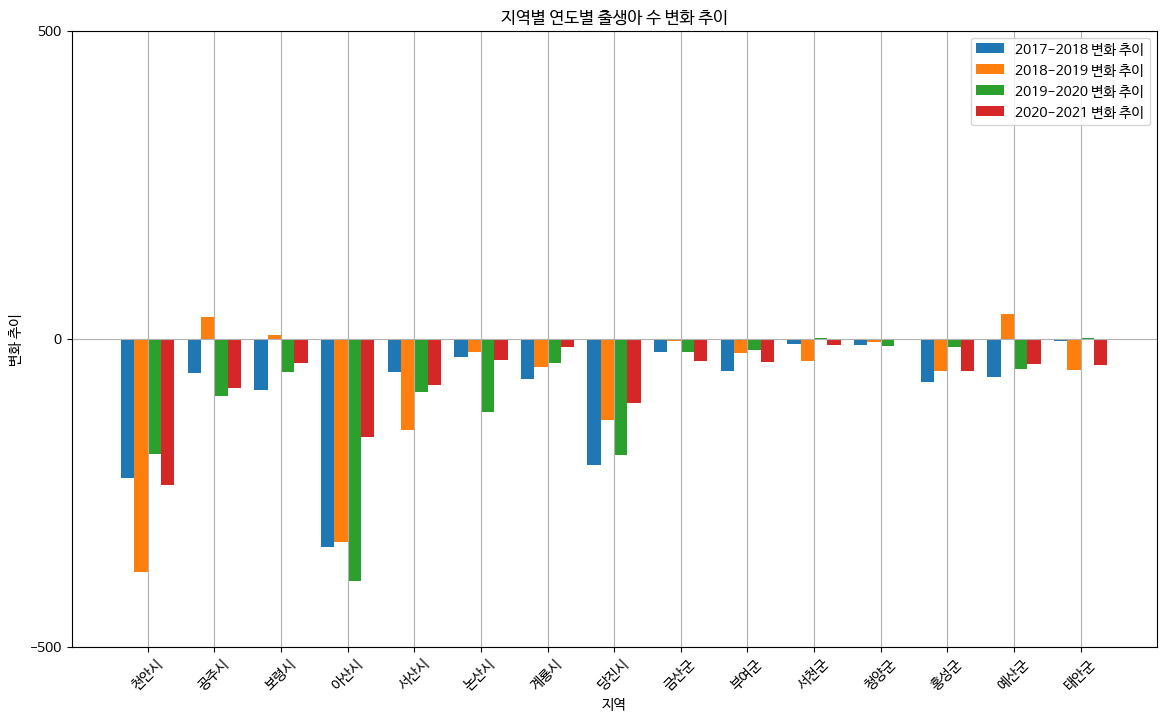

In [42]:
# 연도별 변화 추이 계산
diff_data = {
    '구 분': df_births_CCND['구 분'],
    '2017-2018 변화 추이': df_births_CCND['2018년'] - df_births_CCND['2017년'],
    '2018-2019 변화 추이': df_births_CCND['2019년'] - df_births_CCND['2018년'],
    '2019-2020 변화 추이': df_births_CCND['2020년'] - df_births_CCND['2019년'],
    '2020-2021 변화 추이': df_births_CCND['2021년'] - df_births_CCND['2020년']
}

df_diff = pd.DataFrame(diff_data)

# 데이터 시각화
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = np.arange(len(df_diff))

# 각 연도별 변화 추이 막대그래프 그리기
ax.bar(index - 1.5 * bar_width, df_diff['2017-2018 변화 추이'], bar_width, label='2017-2018 변화 추이')
ax.bar(index - 0.5 * bar_width, df_diff['2018-2019 변화 추이'], bar_width, label='2018-2019 변화 추이')
ax.bar(index + 0.5 * bar_width, df_diff['2019-2020 변화 추이'], bar_width, label='2019-2020 변화 추이')
ax.bar(index + 1.5 * bar_width, df_diff['2020-2021 변화 추이'], bar_width, label='2020-2021 변화 추이')

# 그래프 제목 및 축 레이블 설정
ax.set_xlabel('지역')
ax.set_ylabel('변화 추이')
ax.set_title('지역별 연도별 출생아 수 변화 추이')
ax.set_xticks(index)
ax.set_xticklabels(df_diff['구 분'], rotation=45)

# y축 눈금 설정
# 변화 추이의 최소값과 최대값을 계산
min_y = df_diff[['2017-2018 변화 추이', '2018-2019 변화 추이', '2019-2020 변화 추이', '2020-2021 변화 추이']].min().min()
max_y = df_diff[['2017-2018 변화 추이', '2018-2019 변화 추이', '2019-2020 변화 추이', '2020-2021 변화 추이']].max().max()

# 눈금 범위를 데이터 범위에 맞게 조정
y_ticks = np.arange(np.floor(min_y / 500) * 500, np.ceil(max_y / 500) * 500 + 500, 500)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{int(tick)}" for tick in y_ticks])

# 범례 추가
ax.legend()

# 그리드 추가
ax.grid(True)

# 그래프 출력
plt.show()

#### 2. 복합적 출생아 수 현황 분석

In [30]:
# 인구 data 불러오기

# CSV 파일 경로 지정
file_path_03 = '/content/drive/MyDrive/천안 공공데이터 활용 정책제안 공모전/dataset/인구__가구_및_주택_–_읍면동_연도_끝자리_0__5___시군구_그_외_연도__20240729224209.csv'

# CSV 파일을 DataFrame으로 읽어오기
df_population = pd.read_csv(file_path_03)

In [31]:
df_population

,행정구역별(읍면동),2015,2016,2017,2018,2019,2020,2021,2022,2023
0,행정구역별(읍면동),총인구 (명),총인구 (명),총인구 (명),총인구 (명),총인구 (명),총인구 (명),총인구 (명),총인구 (명),총인구 (명)
1,전국,51069375,51269554,51422507,51629512,51779203,51829136,51738071,51692272,51774521
2,읍부,4616802,4707855,4794377,4984023,5057507,5113052,5183834,5098892,5131418
3,면부,4774878,4793569,4835090,4730290,4698591,4650781,4534456,4506486,4536053
4,동부,41677695,41768130,41793040,41915199,42023105,42065303,42019781,42086894,42107050
...,...,...,...,...,...,...,...,...,...,...
325,읍부,129134,134561,141557,147773,151015,153767,153891,154606,155260
326,면부,31078,31890,33683,35323,35474,35539,35587,36397,37027
327,동부,445407,456881,466517,475186,478559,481552,483629,485372,484480
328,제주시,451758,462286,472399,482932,487688,492306,493869,495281,495553
